# Machine learning

In [35]:
import pandas as pd
import json
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

In [36]:
BASE_PATH = "../data/processed"
TRAIN_PATHS = [
    "X_train_con_outliers.xlsx",
    "X_train_sin_outliers.xlsx",
    "X_train_con_outliers_norm.xlsx",
    "X_train_sin_outliers_norm.xlsx",
    "X_train_con_outliers_scal.xlsx",
    "X_train_sin_outliers_scal.xlsx"
]
TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    TRAIN_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

TEST_PATHS = [
    "X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx",
    "X_test_con_outliers_norm.xlsx",
    "X_test_sin_outliers_norm.xlsx",
    "X_test_con_outliers_scal.xlsx",
    "X_test_sin_outliers_scal.xlsx"
]
TEST_DATASETS = []
for path in TEST_PATHS:
    TEST_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")


## Regresión lineal

In [37]:
results = []
models=[]

for index, dataset in enumerate(TRAIN_DATASETS):
    model = LinearRegression()
    model.fit(dataset, y_train)
    models.append(model)
    
    y_pred_train = model.predict(dataset)
    y_pred_test = model.predict(TEST_DATASETS[index])

    results.append(
        {
            "train_mse": mean_squared_error(y_train, y_pred_train),
            "train_r2": r2_score(y_train, y_pred_train),
            "test_mse": mean_squared_error(y_test, y_pred_test),
            "test_r2": r2_score(y_test, y_pred_test)
        }
    )


results

[{'train_mse': 1225312.2016433328,
  'train_r2': 0.9956629466226504,
  'test_mse': 856103.290115265,
  'test_r2': 0.9902188103441386},
 {'train_mse': 134881465.76643315,
  'train_r2': 0.5225803547376698,
  'test_mse': 45948176.2738033,
  'test_r2': 0.4750308383763969},
 {'train_mse': 1224657.9226399234,
  'train_r2': 0.9956652624756696,
  'test_mse': 854286.8546678853,
  'test_r2': 0.9902395635637719},
 {'train_mse': 134881465.76643318,
  'train_r2': 0.5225803547376697,
  'test_mse': 45948176.27380285,
  'test_r2': 0.47503083837640203},
 {'train_mse': 1224657.929020841,
  'train_r2': 0.995665262453084,
  'test_mse': 854286.8408392173,
  'test_r2': 0.9902395637217677},
 {'train_mse': 134881465.76643312,
  'train_r2': 0.52258035473767,
  'test_mse': 45948176.27380275,
  'test_r2': 0.47503083837640314}]

In [38]:
best_model=3
final_model = models[best_model]

with open("../models/linear_best_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

with open("../models/final_results_linear.json", "w") as f:
    json.dump(results, f, indent=4)

## Regresión lineal regularizada

In [42]:
X_train = TRAIN_DATASETS[5]
X_test = TEST_DATASETS[5]
y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")

In [43]:
lasso_model = Lasso(alpha = 0.00000001, max_iter = 1000000)

lasso_model.fit(X_train, y_train)

y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)

print("Lasso (alpha=0.1)")
print(f"Train R²: {r2_score(y_train, y_pred_train_lasso):.4f}")
print(f"Test  R²: {r2_score(y_test, y_pred_test_lasso):.4f}")
print(f"Train MSE: {mean_squared_error(y_train, y_pred_train_lasso):.2f}")
print(f"Test  MSE: {mean_squared_error(y_test, y_pred_test_lasso):.2f}")

Lasso (alpha=0.1)
Train R²: 0.5226
Test  R²: 0.4750
Train MSE: 134881465.77
Test  MSE: 45948176.27


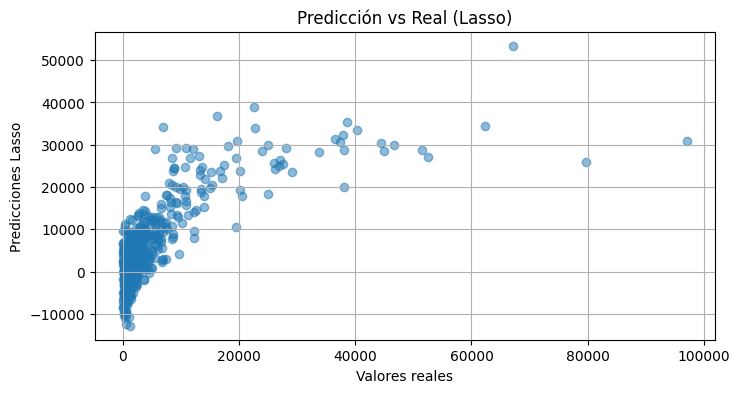

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_test_lasso, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones Lasso")
plt.title("Predicción vs Real (Lasso)")
plt.grid(True)
plt.show()

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_train.index.equals(y_train.index))

(2512, 44)
(2512, 1)
True
